In [1]:
import tradingeconomics as te
import pandas as pd
import matplotlib.pyplot as plt

import os
os.chdir('..')
from helper import get_api_key

In [ ]:
te.login(get_api_key())

In [3]:
data = te.getEarnings(country = 'united states', output_type='df')

In [4]:
nan_value = float("NaN")

df = data[['Name','Actual','Forecast']].set_index('Name')

df.replace("", nan_value, inplace=True)
df.dropna(subset = ["Actual","Forecast"], inplace=True)


df["Diff"] = df['Forecast'].astype(float) - df['Actual'].astype(float)
df['Diff'] = df['Diff'].astype(float)
df = df.sort_values('Diff', ascending = False)
df = df.head(10)
df['Actual'] = df['Actual'].astype(float)
df = df.sort_values('Actual', ascending = False)


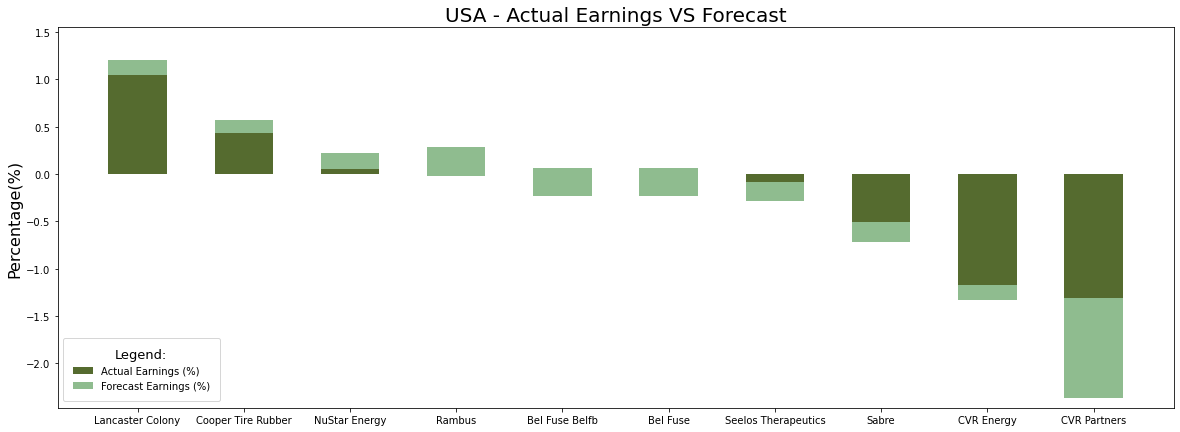

In [5]:
labels = df.index.tolist()
actual_values = df['Actual'].values.tolist()
difference_values = df['Diff'].values.tolist()

width = 0.55    

fig, ax = plt.subplots(figsize=(20, 7))

ax.bar(labels, actual_values, width, label='Actual Earnings (%)',color='darkolivegreen')
ax.bar(labels, difference_values, width,
       label='Forecast Earnings (%)', color='darkseagreen',bottom=actual_values)

ax.set_ylabel('Percentage(%)', size=16)
ax.set_title('USA - Actual Earnings VS Forecast', color='black', size=20)



plt.legend(
          title="Legend:",
          loc="center left",
          bbox_to_anchor=(0, -0.4, 0.5, 1),
          fontsize=10,
          ncol=1,
          title_fontsize=13,
          borderpad=1)
plt.ylim([min(actual_values)-0.1, max(actual_values)+0.5])
plt.show()

